# Background
The dataset is from the publicly available data from lendingclub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). A potential investor would want to invest in people who showed a profile of having a high probability of paying the loan back. 

# Objective
To create a model that predicts which of the borrowers would payback the loan.

# Dataset
The dataset contains the following variables:

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
loans = pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

In [3]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


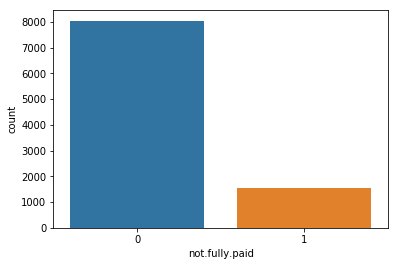

In [21]:
sns.countplot(x = loans['not.fully.paid'])
plt.show()

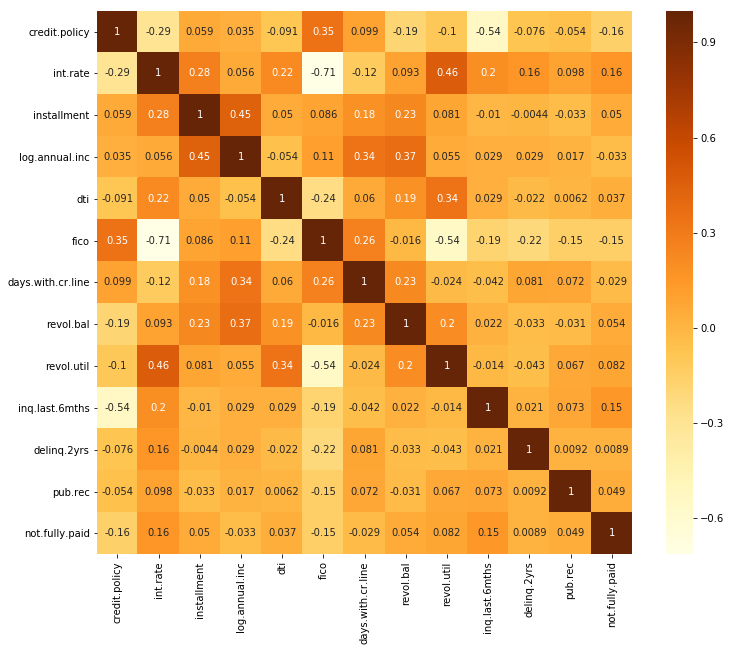

In [5]:
plt.figure(figsize = (12,10))
sns.heatmap(loans.corr(), cmap = 'YlOrBr', annot=True)
plt.show()

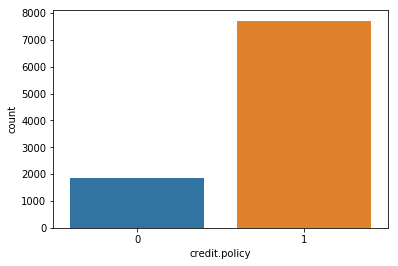

In [6]:
sns.countplot(x = loans['credit.policy'])
plt.show()

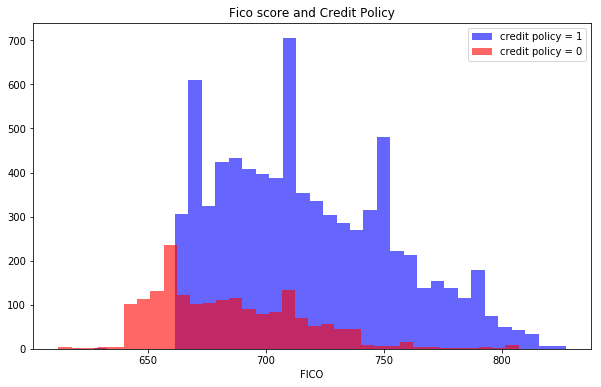

In [7]:
plt.figure(figsize=(10, 6))
loans[loans['credit.policy'] == 1]['fico'].hist(bins=35, color = 'blue', label = 'credit policy = 1', alpha = 0.6).grid(False)
loans[loans['credit.policy'] == 0]['fico'].hist(bins=35, color = 'red', label = 'credit policy = 0',alpha = 0.6).grid(False)
plt.xlabel('FICO')
plt.legend()
plt.title('Fico score and Credit Policy')
plt.show()

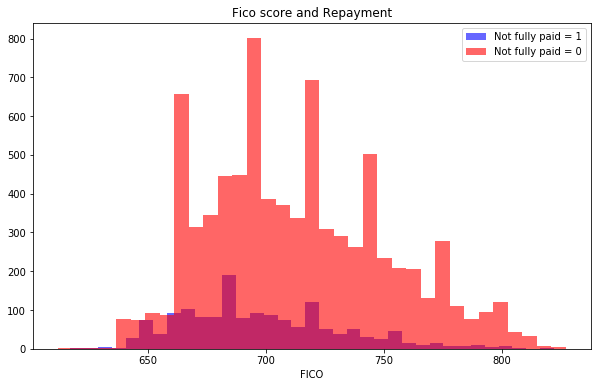

In [8]:
plt.figure(figsize=(10, 6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35, color = 'blue', label = 'Not fully paid = 1', alpha = 0.6, grid = False)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35, color = 'red', label = 'Not fully paid = 0', alpha = 0.6, grid = False)
plt.xlabel('FICO')
plt.legend()
plt.title('Fico score and Repayment')
plt.show()

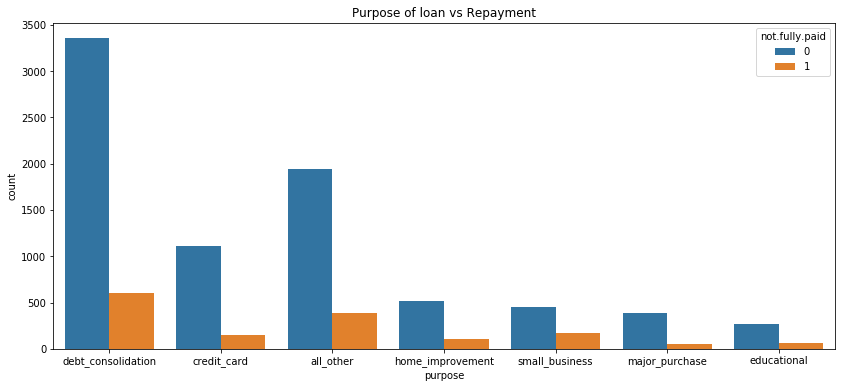

In [9]:
plt.figure(figsize=(14, 6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = loans)
plt.title('Purpose of loan vs Repayment')
plt.show()

**Trend between fico scores and interest rates**

<Figure size 576x432 with 0 Axes>

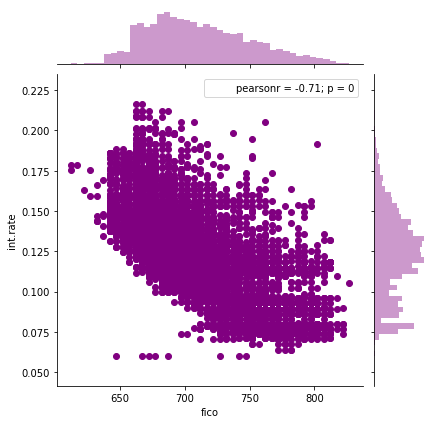

In [10]:
plt.figure(figsize=(8, 6))
sns.jointplot(y = 'int.rate', x='fico', data = loans, color= 'purple')
plt.show()

**Trend between repayment and credit policy on interest rate**

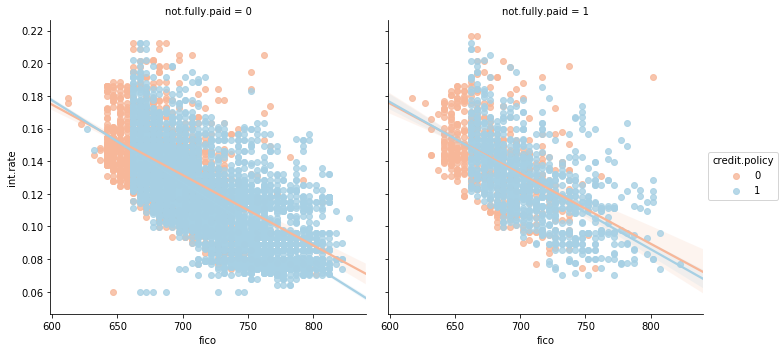

In [11]:
sns.lmplot(x = 'fico', y ='int.rate', data = loans, hue='credit.policy', col='not.fully.paid', palette='RdBu')
plt.show()

**One-hot encoding of categorical features**

In [12]:
loans = pd.get_dummies(data = loans, columns = ['purpose'], drop_first=True)
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [13]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

# Train-Test Split

In [14]:
X = loans.drop('not.fully.paid', axis = 1)
y = loans['not.fully.paid']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Training a Decision Tree Model

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

predict = dtree.predict(X_test)

## Prediction and Evaluation of Decision Tree

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(predict, y_test))
print('\n')
print(confusion_matrix(predict, y_test))

             precision    recall  f1-score   support

          0       0.84      0.85      0.85      2631
          1       0.22      0.21      0.22       530

avg / total       0.74      0.74      0.74      3161



[[2232  399]
 [ 418  112]]


# Training a Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=2000)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

## Predictions and Evaluations of Random Forest

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')
print(classification_report(y_test, y_pred))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Classification Report
             precision    recall  f1-score   support

          0       0.84      0.99      0.91      2650
          1       0.38      0.02      0.03       511

avg / total       0.76      0.84      0.77      3161



Confusion Matrix
[[2635   15]
 [ 502    9]]


# Conclusion

Both models performed well in predicting true negatives, meaning *the model accurately predicted that the user repaid the loans.*  This can be attributed to the fact that the test dataset overwhelmingly contained values which was categorized as *not fully paid or value 0.*

Both models performed poorly in predicting false negatives meaning *the model predicted that the user repaid the loan when in actuality, the user did not.* For a money lending firm, a poor prediction of false negatives can be fatal. In such a scenario, loans will be given to people who have lower probability of repaying it fully. So, both models perform poorly in this metric.